In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_reviews = pd.read_csv("AllProductReviews.csv")
data_info = pd.read_csv("ProductInfo.csv")  
 
data_reviews.info()
data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ReviewTitle  14337 non-null  object
 1   ReviewBody   14337 non-null  object
 2   ReviewStar   14337 non-null  int64 
 3   Product      14337 non-null  object
dtypes: int64(1), object(3)
memory usage: 448.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MRP               10 non-null     int64 
 1   Price             10 non-null     int64 
 2   ProductFullName   10 non-null     object
 3   ProductShortName  10 non-null     object
 4   ReviewURL         10 non-null     object
 5   id                10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [3]:
df_merged = pd.merge(data_reviews, data_info[['ProductShortName', 'id']],
                     left_on='Product', right_on='ProductShortName', how='left')

df_merged.drop(columns=['ProductShortName'], inplace=True)

df_merged.head(10)

,ReviewTitle,ReviewBody,ReviewStar,Product,id
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,1
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,1
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,1
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,1
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,1
5,Charging port not working\n,"After 11 days, the charging port isn't working...",1,boAt Rockerz 255,1
6,Loved the color and sound !!\n,Sound-4.5/5Build quality-4.5/5Battery life -4/...,4,boAt Rockerz 255,1
7,Great sound with worst mic.\n,After one month usage reviewing this .Pros-1- ...,3,boAt Rockerz 255,1
8,Battery life is good enough to keep going all ...,I can’t get enough of this earphone! The bass ...,5,boAt Rockerz 255,1
9,Very very bad Durabity\n,The product durability is 1 month..I just lost...,1,boAt Rockerz 255,1


After some preprocessing steps, it's time the number of reviews for each product and it shows that boAt, Sennheiser and JBL T110 are the most reviewed products while Flybot are the lest reviewed

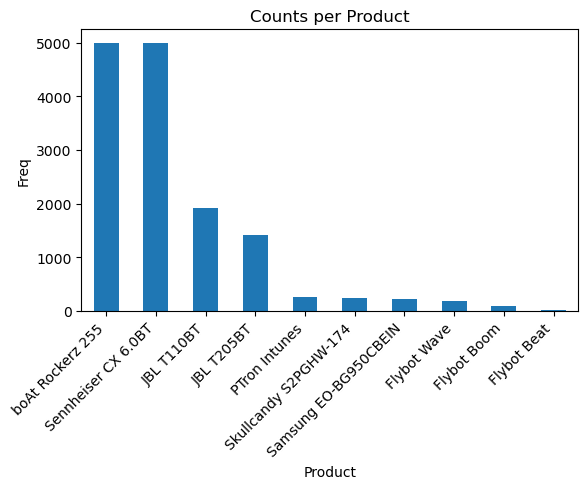

In [4]:
df_merged['Product'].value_counts().plot(kind='bar', figsize=(6, 5))
plt.xlabel("Product")
plt.ylabel("Freq")
plt.title('Counts per Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A review stars analysis is conducted in order to establish which are the least appreciated products among them. Resulting products will be the core of the textual analysis of the comments.

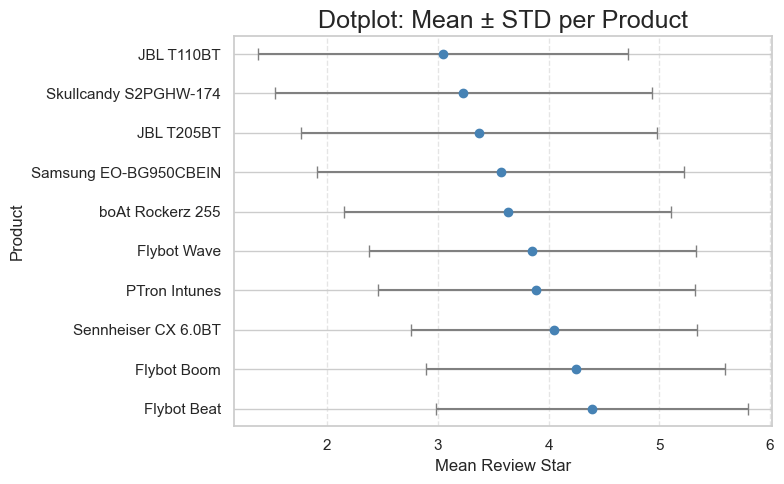

In [5]:
summary_reviewsstar = df_merged.groupby("Product")["ReviewStar"].agg(['mean', 'std', 'median'])
summary_reviewsstar = summary_reviewsstar.sort_values(by='mean', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(8, len(summary_reviewsstar) * 0.5))


plt.errorbar(
    x=summary_reviewsstar["mean"],
    y=summary_reviewsstar.index,
    xerr=summary_reviewsstar["std"],
    fmt='o',
    color='steelblue',
    ecolor='gray',
    capsize=4
)
plt.xlabel("Mean Review Star")
plt.ylabel("Product")
plt.title("Dotplot: Mean ± STD per Product", fontsize = 18)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()


plt.savefig("reviewstar_dotplot.png", dpi=300)
plt.show()

JBL T110BT, Skullcandy S2PGHW-174 and JBL T205BT are the the products with least score in terms of mean review stars

In [6]:
import zipfile
import os

# Crea le tabelle da esportare
summary_reviewsstar = df_merged.groupby("Product")["ReviewStar"].agg(['mean', 'std', 'median'])
product_counts = df_merged['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'Count']

# Salva le tabelle come CSV
summary_reviewsstar.to_csv("review_summary.csv", index=True)
product_counts.to_csv("product_units.csv", index=False)

# Comprimi tutto in un singolo file ZIP
with zipfile.ZipFile("analisi_reviews.zip", "w") as zipf:
    zipf.write("review_summary.csv")
    zipf.write("product_units.csv")

# Rimuovi i singoli file CSV se non servono più
os.remove("review_summary.csv")
os.remove("product_units.csv")